<h1 align="center">Multi-Layer Perceptron (MLP) Network - Spiral</h1>

<hr>
<h3>Training sample</h3>
<p>2-dimensional <strong style="color:red">hard+hard</strong> samples generated by numpy</p>

<hr>
<h3>Ploting scatter data of 2-classes</h3>
<p>隨機產生雙螺旋型樣本</p>
<p>經典 <strong style="color:red">Spiral</strong> 難題</p>

In [1]:
# matplotlib 第一張圖常常不能顯示，所以先產生一張，當作啟動，讓後續真正需要的圖表能正常顯示
import matplotlib.pyplot as plt
plt.show()

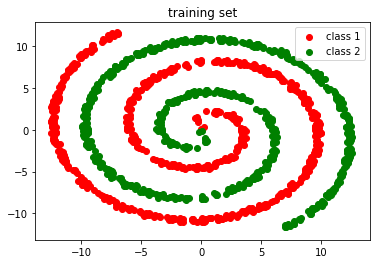

In [2]:
import numpy as np
import matplotlib.pyplot as plt

N1 = 300
N2 = 300
N = N1 + N2

def twospirals(n_points, noise=.5):
    # Returns the two spirals dataset.
    n = np.sqrt(np.random.rand(n_points,1)) * 780 * (2*np.pi)/360
    d1x = -np.cos(n)*n + np.random.rand(n_points,1) * noise
    d1y = np.sin(n)*n + np.random.rand(n_points,1) * noise
    return (np.vstack((np.hstack((d1x,d1y)),np.hstack((-d1x,-d1y)))), 
            np.hstack((np.zeros(n_points),np.ones(n_points))))

coord, klass = twospirals(N)

x1 = coord[klass==0,0]
y1 = coord[klass==0,1]
x2 = coord[klass==1,0]
y2 = coord[klass==1,1]

plt.title('training set')

plt.scatter(x1, y1, color='red',   label='class 1')
plt.scatter(x2, y2, color='green', label='class 2')

plt.legend()

plt.show()


<hr>
<h3><strong style="color:red">MLP</strong> Neuron Definition in PyTorch (<strong style="color:orange">Deep Learning</strong>)</h3>

In [3]:
import torch.nn as nn

class MLPNet(nn.Module):
    def __init__(self):
        super(MLPNet, self).__init__()
        # 2 inputs -> 256 hiddens --> 64 hiddens --> 8 hiddens --> 2 outputs
        self.fc1 = nn.Linear(2, 256)
        self.fc2 = nn.Linear(256, 64)
        self.fc3 = nn.Linear(64, 8)
        self.fc4 = nn.Linear(8, 2)
    def forward(self, x):
        x = self.fc1(x).clamp(min=0)
        x = self.fc2(x).clamp(min=0)
        x = self.fc3(x).clamp(min=0)
        x = self.fc4(x)
        return x

mlp = MLPNet()

print(mlp)

MLPNet(
  (fc1): Linear(in_features=2, out_features=256, bias=True)
  (fc2): Linear(in_features=256, out_features=64, bias=True)
  (fc3): Linear(in_features=64, out_features=8, bias=True)
  (fc4): Linear(in_features=8, out_features=2, bias=True)
)


<hr>
<h3>All parameters to be determined (2x256+256x64+64x8+8x2 for weights and 256+64+8+2 for biases)</h3>

In [4]:
# params = list(mlp.parameters())
# print(params)

<hr>
<h3><strong style="color:red">MLP</strong> Training Phase</h3>
<p><strong style="color:orange">Learning Rate</strong> 調低（0.001），難題要慢慢學才學得好、、、</p>

In [5]:
import torch
import torch.nn as nn
import torch.optim as optim

EPOCH = 10000

# preparing training samples

x = torch.randn(N, 2)
y = torch.randn(N, 2)
for i in range(N1):
    x[i,0] = x1[i]
    x[i,1] = y1[i]
    y[i,0] = 1
    y[i,1] = 0
for i in range(N1, N1+N2):
    x[i,0] = x2[i-N1]
    x[i,1] = y2[i-N1]
    y[i,0] = 0
    y[i,1] = 1

# shuffling

idx = [i for i in range(N)]
idx = np.random.permutation(idx)
x0 = x
y0 = y
for i in range(N):
    x[i] = x0[idx[i]]
    y[i] = y0[idx[i]]

# Loss function
criterion = nn.MSELoss()
# Optimizer
# optimizer = optim.SGD(mlp.parameters(), lr=0.01)
optimizer = optim.Adam(mlp.parameters(), lr=0.001)

# training
for epoch in range(EPOCH):
    # zero the gradient buffers
    optimizer.zero_grad()
    # feed foreward
    output = mlp(x)
    # evaluating loss
    loss = criterion(output, y)
    # display loss
    if (epoch % 1000 == 0):
        print('epoch = %6d, loss = %12.8f' % (epoch, loss))
    # feed backward
    loss.backward()
    # update parameters
    optimizer.step()


epoch =      0, loss =   0.56133336
epoch =   1000, loss =   0.00086101
epoch =   2000, loss =   0.00031717
epoch =   3000, loss =   0.00009912
epoch =   4000, loss =   0.00016183
epoch =   5000, loss =   0.00010267
epoch =   6000, loss =   0.00010068
epoch =   7000, loss =   0.00010445
epoch =   8000, loss =   0.00010888
epoch =   9000, loss =   0.00008060


<hr>
<h3>學好的記憶可以儲存</h3>

In [6]:
# Save torch model
torch.save(mlp.state_dict(), 'mlp.model')

<hr>
<h3>學好的記憶可以瞬間載入，不用再度重新學習</h3>

In [7]:
# MLP 產生
mlp = MLPNet()

# Load torch model
mlp.load_state_dict(torch.load('mlp.model', map_location='cpu'))
mlp.eval()
print('Load previous mlp model completely!')


Load previous mlp model completely!


<hr>
<h3><strong style="color:red">MLP</strong> Testing Phase - It's OK'</h3>

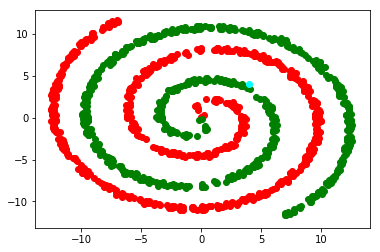

(v1, v2) =  0.0893382877111435 0.9247931241989136
class 2: green


In [8]:
import numpy as np
import matplotlib.pyplot as plt

# 測試樣本
x3 = [4.0] # 測試點 X 座標
y3 = [4.0] # 測試點 Y 座標

# 繪製樣本圖
plt.scatter(x1, y1, c='red')
plt.scatter(x2, y2, c='green')
plt.scatter(x3, y3, c='cyan')
plt.show()

# 準備測試樣本，轉變格式成為 Tensor
x = torch.Tensor([x3[0],y3[0]])

# 測試（feed foreward）
output = mlp(x)

# 由輸出 Tensor 取出結果
v1 = output.tolist()[0]
v2 = output.tolist()[1]

# 顯示結果
print('(v1, v2) = ', v1, v2)
if (v1 >= v2):
    print('class 1: red')
else:
    print('class 2: green')


<hr>
<h3><strong style="color:red">MLP</strong> Testing all training samples</h3>

Recognition Rate = 592 / 600


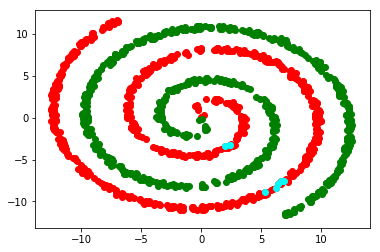

In [9]:
import numpy as np
import matplotlib.pyplot as plt

x = torch.randn(N, 2)
y = torch.randn(N, 1)

# 準備整批樣本（Class 1）
for i in range(N1):
    # 準備測試樣本，轉變格式成為 Tensor
    x[i] = torch.Tensor([x1[i],y1[i]])  
# 整批測試（feed foreward）
output = mlp(x)
# 由輸出 Tensor 取出結果
lst1 = output.tolist()

# 準備整批樣本（Class 2）
for i in range(N2):
    # 準備測試樣本，轉變格式成為 Tensor
    x[i] = torch.Tensor([x2[i],y2[i]])  
# 整批測試（feed foreward）
output = mlp(x)
# 由輸出 Tensor 取出結果
lst2 = output.tolist()

# 顯示結果

x3 = []
y3 = []

correct = 0
for i in range(N1):
    v1 = lst1[i][0]
    v2 = lst1[i][1]
    if (v1 >= v2):
        correct = correct + 1
    else:
        x3.append(x1[i])
        y3.append(y1[i])
for i in range(N2):
    v1 = lst2[i][0]
    v2 = lst2[i][1]
    if (v2 >= v1):
        correct = correct + 1
    else:
        x3.append(x2[i])
        y3.append(y2[i])
        
print('Recognition Rate = %d / %d' % (correct, N1+N2))

# 繪製樣本圖
plt.scatter(x1, y1, c='red')
plt.scatter(x2, y2, c='green')
plt.scatter(x3, y3, c='cyan')
plt.show()


<hr>
<h3><strong style="color:red">MLP</strong> Testing all other samples</h3>

Recognition Rate = 590 / 600


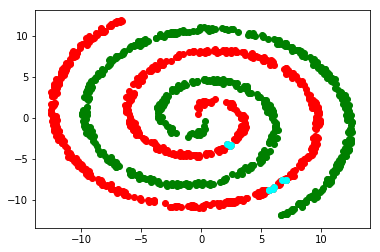

In [10]:
import numpy as np
import matplotlib.pyplot as plt

# 利用相同的隨機分布，重新產生一組整批測試用的樣本

def twospirals(n_points, noise=.5):
    # Returns the two spirals dataset.
    n = np.sqrt(np.random.rand(n_points,1)) * 780 * (2*np.pi)/360
    d1x = -np.cos(n)*n + np.random.rand(n_points,1) * noise
    d1y = np.sin(n)*n + np.random.rand(n_points,1) * noise
    return (np.vstack((np.hstack((d1x,d1y)),np.hstack((-d1x,-d1y)))), 
            np.hstack((np.zeros(n_points),np.ones(n_points))))

coord, klass = twospirals(N)

x1 = coord[klass==0,0]
y1 = coord[klass==0,1]
x2 = coord[klass==1,0]
y2 = coord[klass==1,1]

x = torch.randn(N, 2)
y = torch.randn(N, 1)

# 準備整批樣本（Class 1）
for i in range(N1):
    # 準備測試樣本，轉變格式成為 Tensor
    x[i] = torch.Tensor([x1[i],y1[i]])  
# 整批測試（feed foreward）
output = mlp(x)
# 由輸出 Tensor 取出結果
lst1 = output.tolist()

# 準備整批樣本（Class 2）
for i in range(N2):
    # 準備測試樣本，轉變格式成為 Tensor
    x[i] = torch.Tensor([x2[i],y2[i]])  
# 整批測試（feed foreward）
output = mlp(x)
# 由輸出 Tensor 取出結果
lst2 = output.tolist()

# 顯示結果

x3 = []
y3 = []

correct = 0
for i in range(N1):
    v1 = lst1[i][0]
    v2 = lst1[i][1]
    if (v1 >= v2):
        correct = correct + 1
    else:
        x3.append(x1[i])
        y3.append(y1[i])
for i in range(N2):
    v1 = lst2[i][0]
    v2 = lst2[i][1]
    if (v2 >= v1):
        correct = correct + 1
    else:
        x3.append(x2[i])
        y3.append(y2[i])
        
print('Recognition Rate = %d / %d' % (correct, N1+N2))

# 繪製樣本圖
plt.scatter(x1, y1, c='red')
plt.scatter(x2, y2, c='green')
plt.scatter(x3, y3, c='cyan')
plt.show()
